In [1]:
import scipy.stats as stats

# Given values
mean_production_time = 3  # days
std_deviation = 0.5  # days
delivery_time = 6  # days

# Calculate Z-score for 6 days
z_score = (delivery_time - mean_production_time) / std_deviation

# Calculate the probability of orders being delivered within 6 days
prob_within_6_days = stats.norm.cdf(z_score)

# The probability of orders being delivered beyond 6 days
prob_beyond_6_days = 1 - prob_within_6_days
print('a',prob_beyond_6_days)


a 9.865877004244794e-10


,Time (Hour),Mail Arrival Rate (per hour),Number of Workers,Processing Rate (per hour),Difference (Mail Arrival - Processing Rate),Cumulative Difference,Cumulative Difference Adjusted
0,7,24000,20,12000,12000,12000,12000
1,8,24000,20,12000,12000,24000,24000
2,9,24000,20,12000,12000,36000,36000
3,10,34000,60,36000,-2000,34000,34000
4,11,34000,60,36000,-2000,32000,32000
5,12,34000,60,36000,-2000,30000,30000
6,13,34000,60,36000,-2000,28000,28000
7,14,34000,60,36000,-2000,26000,26000
8,15,11500,40,24000,-12500,13500,13500
9,16,11500,40,24000,-12500,1000,1000


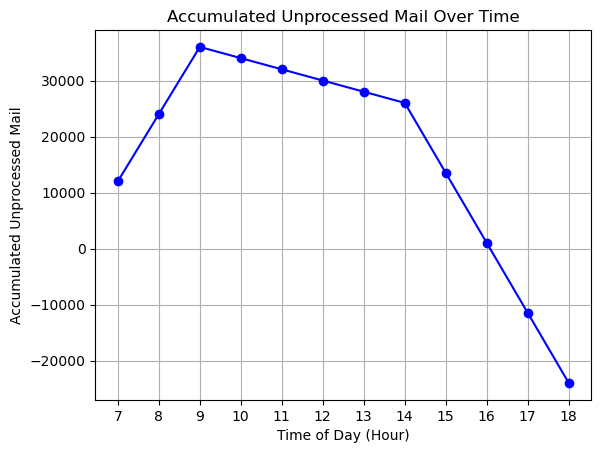

(19708.333333333332, 0.8211805555555555)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare data for each hour
hourly_processing_rate_data = []

# For 7:00 am to 10:00 am (20 workers, 12,000 mails per hour)
for hour in range(7, 10):
    hourly_processing_rate_data.append([hour, 20, 12000])

# For 10:00 am to 3:00 pm (60 workers, 36,000 mails per hour)
for hour in range(10, 15):
    hourly_processing_rate_data.append([hour, 60, 36000])

# For 3:00 pm to 7:00 pm (40 workers, 24,000 mails per hour)
for hour in range(15, 19):
    hourly_processing_rate_data.append([hour, 40, 24000])

# Step 2: Create DataFrame for Processing Rates
df_hourly_processing_rate = pd.DataFrame(hourly_processing_rate_data, columns=["Time (Hour)", "Number of Workers", "Processing Rate (per hour)"])

# Step 3: Prepare data for each hour's mail arrival rate
hourly_mail_arrival_data = []

# For 7:00 am to 10:00 am (24,000 mails per hour)
for hour in range(7, 10):
    hourly_mail_arrival_data.append([hour, 24000])

# For 10:00 am to 3:00 pm (34,000 mails per hour)
for hour in range(10, 15):
    hourly_mail_arrival_data.append([hour, 34000])

# For 3:00 pm to 7:00 pm (11,500 mails per hour)
for hour in range(15, 19):
    hourly_mail_arrival_data.append([hour, 11500])

# Step 4: Create DataFrame for Mail Arrival Rates
df_hourly_mail_arrival = pd.DataFrame(hourly_mail_arrival_data, columns=["Time (Hour)", "Mail Arrival Rate (per hour)"])

# Step 5: Combine the data into a single table
combined_data = {
    "Time (Hour)": list(range(7, 19)),
    "Mail Arrival Rate (per hour)": [24000, 24000, 24000, 34000, 34000, 34000, 34000, 34000, 11500, 11500, 11500, 11500],
    "Number of Workers": [20, 20, 20, 60, 60, 60, 60, 60, 40, 40, 40, 40],
    "Processing Rate (per hour)": [12000, 12000, 12000, 36000, 36000, 36000, 36000, 36000, 24000, 24000, 24000, 24000]
}

# Step 6: Create a DataFrame with all combined data
df_combined = pd.DataFrame(combined_data)

# Step 7: Calculate the difference between Mail Arrival and Processing Rate
df_combined['Difference (Mail Arrival - Processing Rate)'] = df_combined['Mail Arrival Rate (per hour)'] - df_combined['Processing Rate (per hour)']

# Step 8: Calculate the cumulative difference (unprocessed mail)
df_combined['Cumulative Difference'] = df_combined['Difference (Mail Arrival - Processing Rate)'].cumsum()

# Step 9: Adjust for cases where unprocessed mail becomes zero
df_combined['Cumulative Difference Adjusted'] = df_combined['Cumulative Difference'].clip(lower=0)  # Set negative values to zero

# Recalculate the total unprocessed mail considering the adjusted values
total_unprocessed_mail_adjusted = df_combined['Cumulative Difference Adjusted'].sum()

# Calculate the average unprocessed mail (b) by dividing total unprocessed mail by the number of time periods
total_hours = len(df_combined)
average_unprocessed_mail_adjusted = total_unprocessed_mail_adjusted / total_hours

# Step 10: Calculate the average waiting time for a mail (c) using Little's Law
total_mail_arrival = df_combined['Mail Arrival Rate (per hour)'].sum()
average_mail_arrival_rate = total_mail_arrival / total_hours
average_waiting_time = average_unprocessed_mail_adjusted / average_mail_arrival_rate

# Display combined data table
import IPython.display as display
display.display(df_combined)

# Step 11: Plot the cumulative difference as an accumulated mail chart (representing unprocessed mail over time)
plt.plot(df_combined['Time (Hour)'], df_combined['Cumulative Difference'], marker='o', linestyle='-', color='b')
plt.title('Accumulated Unprocessed Mail Over Time')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Accumulated Unprocessed Mail')
plt.grid(True)
plt.xticks(df_combined['Time (Hour)'])
plt.show()

# Output the results for b and c
average_unprocessed_mail_adjusted, average_waiting_time


In [3]:
import numpy as np

# 过去60天的需求数据
demand_data = np.array([8, 5, 12, 10, 3, 9, 9, 10, 9, 9, 12, 10, 10, 9, 11, 8, 11, 5, 11, 8, 7, 4, 7, 9, 7, 8, 9, 
                       4, 9, 12, 13, 12, 15, 12, 8, 7, 10, 8, 14, 13, 12, 14, 13, 9, 7, 10, 8, 14, 8, 10, 6, 8, 
                       10, 8, 8, 9, 9, 10, 10, 8, 9, 10, 9, 10, 9, 9])

# 计算过去需求小于9的天数
shortage_days = np.sum(demand_data < 9)

# 计算缺货的概率
probability_stockout = shortage_days / len(demand_data)

# 输出缺货概率
print('a',probability_stockout)
from scipy.stats import poisson

# 计算需求的平均值
lambda_ = np.mean(demand_data)

# 使用泊松分布计算需求小于等于9的概率
probability_stockout_poisson = poisson.cdf(8, lambda_)  # P(X <= 8)

# 输出缺货概率
print('b',probability_stockout_poisson)

from scipy.stats import norm

# 计算需求的均值和标准差
mean_demand = np.mean(demand_data)
std_demand = np.std(demand_data)

# 使用正态分布计算需求小于等于9的概率
probability_stockout_normal = norm.cdf(8, mean_demand, std_demand)  # P(X <= 8)

# 输出缺货概率
print('c',probability_stockout_normal)



a 0.3484848484848485
b 0.4164491266426469
c 0.29595234651087154


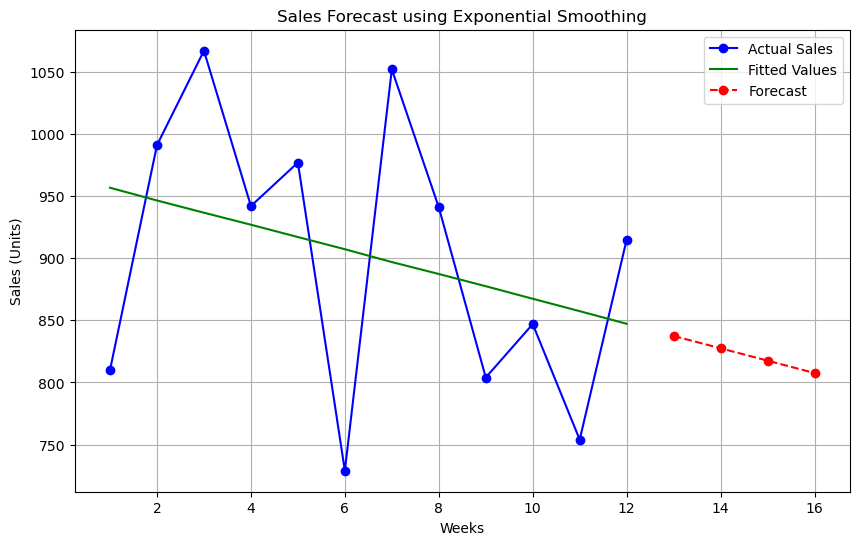

(9326.830070138107, 0.5922584326323601)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

# 销售数据（过去12周）
sales = np.array([810, 991, 1067, 942, 977, 729, 1052, 941, 804, 847, 754, 915])

# 将销售数据转换为pandas Series
sales_series = pd.Series(sales)

# 使用指数平滑法进行预测
# model = ExponentialSmoothing(sales_series, trend='add', seasonal=None, damped=False).fit()
model = ExponentialSmoothing(sales_series, trend='add', seasonal=None, damped_trend=False).fit()

# 预测未来4周的销售量
forecast_next_4_weeks = model.forecast(steps=4)

# 计算均方误差（MSE）
mse = mean_squared_error(sales[1:], model.fittedvalues[1:])

# 计算预测的标准误差（SE）
se = np.sqrt(mse)

# 计算预测销售的均值
forecast_mean = forecast_next_4_weeks.mean()

# 计算短缺的Z值
z_score = (800 - forecast_mean) / se

# 计算短缺概率
shortage_probability = 1 - norm.cdf(z_score)

# 绘制实际销售值和预测销售值的曲线
weeks = np.arange(1, 13)
forecast_weeks = np.arange(13, 17)

plt.figure(figsize=(10, 6))
plt.plot(weeks, sales, label='Actual Sales', marker='o', color='b')
plt.plot(weeks, model.fittedvalues, label='Fitted Values', color='g')
plt.plot(forecast_weeks, forecast_next_4_weeks, label='Forecast', marker='o', linestyle='--', color='r')

plt.title("Sales Forecast using Exponential Smoothing")
plt.xlabel('Weeks')
plt.ylabel('Sales (Units)')
plt.legend()
plt.grid(True)
plt.show()

# 输出MSE和短缺概率
mse, shortage_probability


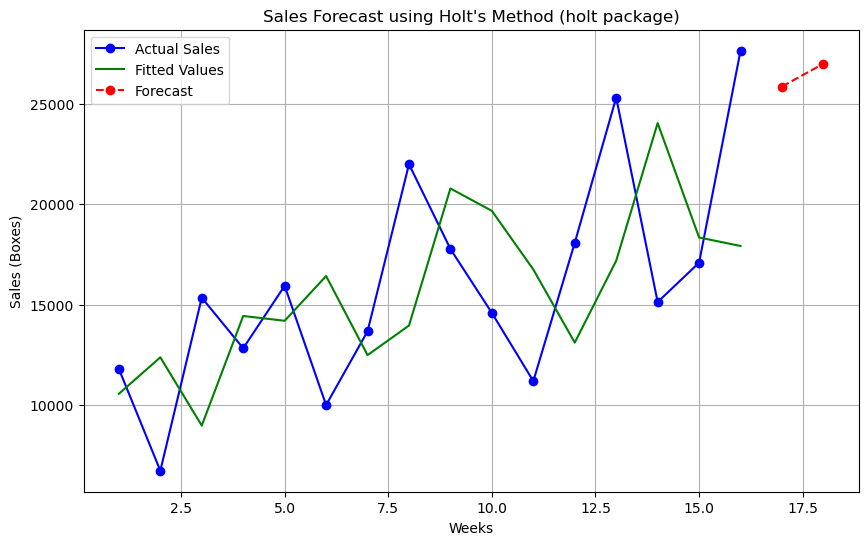

16    25868.669442
17    27004.113753
dtype: float64

Part (b) Optimal alpha and beta:
Optimal alpha: 0.1
Optimal beta: 0.30000000000000004
Minimum MSE: 137102393.45

Part (c) Point forecasts and 90% prediction intervals:
Week 17 forecast: 21876.91 boxes
90% prediction interval for Week 17: [11772.77, 31981.04] boxes
Week 18 forecast: 22631.98 boxes
90% prediction interval for Week 18: [10256.99, 35006.98] boxes


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# Sales data for the last 16 weeks
sales = np.array([11797, 6724, 15346, 12825, 15939, 9997, 13671, 21994, 17774, 14587, 
                 11190, 18083, 25320, 15129, 17092, 27652])

# Holt's method parameters
alpha = 0.7
beta = 0.1

# Convert sales data to a pandas Series for the model
sales_series = pd.Series(sales)

# Apply Holt's method with given alpha and beta
model = Holt(sales_series).fit(smoothing_level=alpha, smoothing_trend=beta)

# Forecast the next 2 weeks
forecast_next_2_weeks_holt = model.forecast(steps=2)

# Weeks for actual sales and forecasted sales
weeks = np.arange(1, 17)
forecast_weeks = np.arange(17, 19)

# Plot the sales and forecasts
plt.figure(figsize=(10, 6))
plt.plot(weeks, sales, label='Actual Sales', marker='o', color='b')
plt.plot(weeks, model.fittedvalues, label='Fitted Values', color='g')
plt.plot(forecast_weeks, forecast_next_2_weeks_holt, label='Forecast', marker='o', linestyle='--', color='r')

plt.title("Sales Forecast using Holt's Method (holt package)")
plt.xlabel('Weeks')
plt.ylabel('Sales (Boxes)')
plt.legend()
plt.grid(True)
plt.show()

# Output forecast values for the next 2 weeks
print(forecast_next_2_weeks_holt)

# Part (b) - Find the best alpha and beta that minimize MSE
best_mse = float('inf')
best_alpha = best_beta = 0
alpha_values = np.linspace(0.1, 1.0, 10)
beta_values = np.linspace(0.1, 1.0, 10)

# Test all combinations of alpha and beta
for alpha in alpha_values:
    for beta in beta_values:
        holt_model = Holt(sales).fit(smoothing_level=alpha, smoothing_trend=beta)
        forecast = holt_model.forecast(steps=len(sales)-1)
        mse = mean_squared_error(sales[1:], forecast)
        if mse < best_mse:
            best_mse = mse
            best_alpha = alpha
            best_beta = beta

print("\nPart (b) Optimal alpha and beta:")
print(f"Optimal alpha: {best_alpha}")
print(f"Optimal beta: {best_beta}")
print(f"Minimum MSE: {best_mse:.2f}")

# Part (c) - Use the method in part (b) to develop point forecasts and 90% prediction interval forecasts
holt_model_opt = Holt(sales).fit(smoothing_level=best_alpha, smoothing_trend=best_beta)
forecast_2_weeks_opt = holt_model_opt.forecast(steps=2)

# Calculate the standard error of the forecast
forecast_residuals = sales - holt_model_opt.fittedvalues
se = np.std(forecast_residuals)  # Standard deviation of residuals

# Calculate prediction intervals for 90% confidence level
z_score = 1.645
se_17 = se * np.sqrt(1 + 1)
se_18 = se * np.sqrt(1 + 2)

# Prediction intervals for week 17 and 18
lower_17 = forecast_2_weeks_opt[0] - z_score * se_17
upper_17 = forecast_2_weeks_opt[0] + z_score * se_17

lower_18 = forecast_2_weeks_opt[1] - z_score * se_18
upper_18 = forecast_2_weeks_opt[1] + z_score * se_18

print("\nPart (c) Point forecasts and 90% prediction intervals:")
print(f"Week 17 forecast: {forecast_2_weeks_opt[0]:.2f} boxes")
print(f"90% prediction interval for Week 17: [{lower_17:.2f}, {upper_17:.2f}] boxes")
print(f"Week 18 forecast: {forecast_2_weeks_opt[1]:.2f} boxes")
print(f"90% prediction interval for Week 18: [{lower_18:.2f}, {upper_18:.2f}] boxes")


In [6]:
shortage_probability


0.5922584326323601